In [90]:
from sklearn.cluster import AgglomerativeClustering 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans


# Load your dataset. 

In [91]:
ds=pd.read_csv("CC GENERAL.csv")
print(ds)

     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0       

In [92]:
ds=ds.drop("CUST_ID", axis=1)
ds

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [93]:
ds['MINIMUM_PAYMENTS'].fillna(value=ds['MINIMUM_PAYMENTS'].median(),inplace=True)
ds['CREDIT_LIMIT'].fillna(value=ds['CREDIT_LIMIT'].median(),inplace=True)

print(ds.isnull().sum())


BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [94]:
scaler = StandardScaler()
ds_scaled = scaler.fit_transform(ds)
ds_scaled=pd.DataFrame(ds_scaled)

In [95]:
ds_normalized =preprocessing. normalize(ds_scaled)
ds_normalized = pd.DataFrame(ds_normalized)
ds_normalized 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.312090,-0.106349,-0.181160,-0.152182,-0.148833,-0.199018,-0.343854,-0.289353,-0.301569,-0.287941,-0.202977,-0.218012,-0.409466,-0.225535,-0.128931,-0.224073,0.153779
1,0.219912,0.037536,-0.131214,-0.099743,-0.127029,0.728121,-0.341413,-0.189648,-0.256249,0.160391,0.030760,-0.165374,0.192447,0.228765,0.027246,0.065453,0.100790
2,0.126690,0.146792,-0.030506,0.030852,-0.128798,-0.132258,0.359794,0.757488,-0.259819,-0.191351,-0.134888,-0.030889,0.234065,-0.108746,-0.026433,-0.148908,0.102194
3,0.020495,-0.424496,0.096865,0.227990,-0.189749,-0.153883,-0.423316,-0.166684,-0.382772,-0.108075,-0.137554,-0.230234,0.344830,-0.249904,-0.095300,-0.219375,0.150555
4,-0.151657,0.218998,-0.195318,-0.146804,-0.192153,-0.197314,-0.428679,-0.168795,-0.387621,-0.285475,-0.201239,-0.233151,-0.382724,-0.154021,-0.108749,-0.222155,0.152462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.146911,0.103140,-0.066352,-0.071058,-0.026407,-0.092927,0.252800,-0.135108,0.234881,-0.134448,-0.094776,-0.069759,-0.191192,-0.096796,-0.067936,0.235700,-0.820759
8946,-0.151357,0.105621,-0.067101,-0.072768,-0.025040,-0.095163,0.258881,-0.138358,0.240531,-0.137682,-0.097056,-0.071437,-0.195791,-0.102627,-0.046545,-0.107143,-0.840503
8947,-0.156995,-0.039329,-0.085233,-0.075685,-0.062529,-0.098978,0.181205,-0.143904,0.161251,-0.143202,-0.100946,-0.082832,-0.203640,-0.120994,-0.069311,0.069804,-0.874196
8948,-0.154340,-0.038416,-0.097253,-0.073928,-0.094151,-0.093069,-0.253049,-0.140563,-0.189927,0.032627,-0.037902,-0.122572,-0.227375,-0.120240,-0.070069,0.068183,-0.853902


# hierarchical clustering

In [96]:
from sklearn.cluster import AgglomerativeClustering 
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(ds_normalized)
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,0
1,4
2,0
3,0
4,0
...,...
8945,3
8946,3
8947,3
8948,3


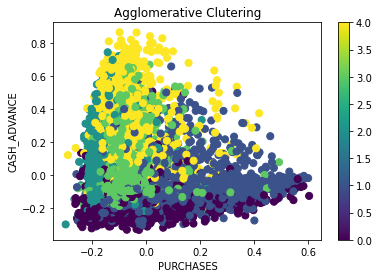

In [97]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (ds_normalized [2] , ds_normalized [5] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("PURCHASES")
ax.set_ylabel("CASH_ADVANCE")
plt.colorbar(scatter)

In [98]:
dsf=ds_normalized [[2, 5]]

plt.figure(figsize=(10,7))
plt.title("PAYMENTS Dendrograms")
dend=shc.dendrogram(shc.linkage(ds_normalized, method="ward"))

In [112]:
kmeans=KMeans(n_clusters=3, random_state=0)  
kmeans.fit(dsf)

KMeans(n_clusters=3, random_state=0)

In [113]:
kmeans.predict(dsf)
print(kmeans.cluster_centers_)

[[-0.13472095 -0.16050008  2.        ]
 [ 0.04146857  0.0445428   3.63629   ]
 [ 0.0149848   0.06233418  0.33720031]]


In [115]:
kmeans=KMeans(n_clusters=10, random_state=0)  
kmeans.fit(dsf)
kmeans.predict(dsf)
print(kmeans.cluster_centers_)

[[ 2.49353806e-01 -8.57746298e-02  3.00000000e+00]
 [ 5.69629519e-02 -1.39234535e-01 -1.37667655e-14]
 [-1.04573526e-01 -1.22107240e-01  2.00000000e+00]
 [-8.71622515e-02  1.91301076e-01  4.00000000e+00]
 [ 8.51606675e-02  3.88915970e-01  1.00000000e+00]
 [-1.65795751e-01 -2.00073926e-01  2.00000000e+00]
 [-1.37441251e-01  4.25856837e-02  4.00000000e+00]
 [-7.38101415e-02  6.34395016e-01  1.00000000e+00]
 [ 4.11245647e-01 -4.27568876e-02  3.00000000e+00]
 [-1.19831776e-01  3.79135607e-01  1.00000000e+00]]


In [116]:
kmeans=KMeans(n_clusters=6, random_state=0)  
kmeans.fit(dsf)
kmeans.predict(dsf)
print(kmeans.cluster_centers_)

[[ 5.69629519e-02 -1.39234535e-01 -1.37667655e-14]
 [ 3.15156169e-01 -6.82896900e-02  3.00000000e+00]
 [-1.34720953e-01 -1.60500078e-01  2.00000000e+00]
 [-1.14974123e-01  1.09039029e-01  4.00000000e+00]
 [-7.10027500e-02  3.74940243e-01  1.00000000e+00]
 [-6.06594372e-02  6.23733076e-01  1.00000000e+00]]


In [103]:
labels=pd.DataFrame(kmeans.labels_)
ds_normalized["label"]=labels

In [104]:
ds_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,label
0,-0.312090,-0.106349,-0.181160,-0.152182,-0.148833,-0.199018,-0.343854,-0.289353,-0.301569,-0.287941,-0.202977,-0.218012,-0.409466,-0.225535,-0.128931,-0.224073,0.153779,2
1,0.219912,0.037536,-0.131214,-0.099743,-0.127029,0.728121,-0.341413,-0.189648,-0.256249,0.160391,0.030760,-0.165374,0.192447,0.228765,0.027246,0.065453,0.100790,1
2,0.126690,0.146792,-0.030506,0.030852,-0.128798,-0.132258,0.359794,0.757488,-0.259819,-0.191351,-0.134888,-0.030889,0.234065,-0.108746,-0.026433,-0.148908,0.102194,0
3,0.020495,-0.424496,0.096865,0.227990,-0.189749,-0.153883,-0.423316,-0.166684,-0.382772,-0.108075,-0.137554,-0.230234,0.344830,-0.249904,-0.095300,-0.219375,0.150555,0
4,-0.151657,0.218998,-0.195318,-0.146804,-0.192153,-0.197314,-0.428679,-0.168795,-0.387621,-0.285475,-0.201239,-0.233151,-0.382724,-0.154021,-0.108749,-0.222155,0.152462,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.146911,0.103140,-0.066352,-0.071058,-0.026407,-0.092927,0.252800,-0.135108,0.234881,-0.134448,-0.094776,-0.069759,-0.191192,-0.096796,-0.067936,0.235700,-0.820759,2
8946,-0.151357,0.105621,-0.067101,-0.072768,-0.025040,-0.095163,0.258881,-0.138358,0.240531,-0.137682,-0.097056,-0.071437,-0.195791,-0.102627,-0.046545,-0.107143,-0.840503,2
8947,-0.156995,-0.039329,-0.085233,-0.075685,-0.062529,-0.098978,0.181205,-0.143904,0.161251,-0.143202,-0.100946,-0.082832,-0.203640,-0.120994,-0.069311,0.069804,-0.874196,2
8948,-0.154340,-0.038416,-0.097253,-0.073928,-0.094151,-0.093069,-0.253049,-0.140563,-0.189927,0.032627,-0.037902,-0.122572,-0.227375,-0.120240,-0.070069,0.068183,-0.853902,2


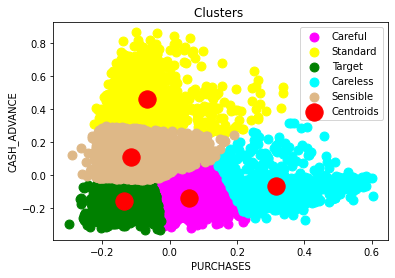

In [108]:
plt.scatter(ds_normalized[2][ds_normalized.label == 0],          
            ds_normalized[5][ds_normalized.label == 0],s=80,c='magenta',label='Careful')
plt.scatter(ds_normalized[2][ds_normalized.label == 1],
           ds_normalized[5][ds_normalized.label == 1],s=80,c='yellow',label='Standard')
plt.scatter(ds_normalized[2][ds_normalized.label == 2],
           ds_normalized[5][ds_normalized.label == 2],s=80,c='green',label='Target')
plt.scatter(ds_normalized[2][ds_normalized.label == 3], 
           ds_normalized[5][ds_normalized.label == 3],s=80,c='cyan',label='Careless')
plt.scatter(ds_normalized[2][ds_normalized.label == 4], 
           ds_normalized[5][ds_normalized.label == 4],s=80,c='burlywood',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters ')
plt.xlabel('PURCHASES')
plt.ylabel('CASH_ADVANCE')
plt.legend()
plt.show()

In [118]:
sum_of_squared_distance=[]
k=range(1,15)
for i in k :
    km=KMeans(n_clusters=i)
    km=km.fit(ds_normalized)
    sum_of_squared_distance.append(km.inertia_)

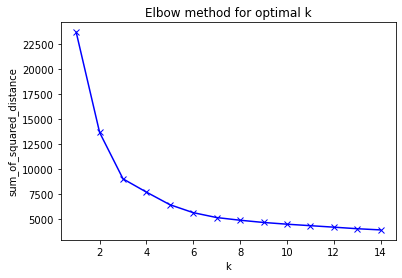

In [120]:
plt.plot(k,sum_of_squared_distance,'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distance')
plt.title('Elbow method for optimal k')
plt.show()

In [122]:
kmeans=KMeans(n_clusters=5, random_state=0)  
kmeans.fit(dsf)
kmeans.predict(dsf)
print(kmeans.cluster_centers_)

[[ 5.69629519e-02 -1.39234535e-01 -1.37667655e-14]
 [ 3.15156169e-01 -6.82896900e-02  3.00000000e+00]
 [-1.34720953e-01 -1.60500078e-01  2.00000000e+00]
 [-1.14974123e-01  1.09039029e-01  4.00000000e+00]
 [-6.75273020e-02  4.58536917e-01  1.00000000e+00]]


# the elbow method give us the optimal k value wich is 5